In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from pylab import rcParams
rcParams['figure.figsize'] = 15,6
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

### Задание

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

#### Этапы работы:

1. Получите и загрузите данные.


2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.


3. Снова загрузите полные данные.


4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.


5. Проверьте данные на наличие пропущенных значений.
    
    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
    
    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.


6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.


7. Проверьте данные на наличие выбросов.
    a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.


8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)


9. Попробуйте математически преобразовать признак Age.


10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.


11. Сформулируйте выводы по проделанной работе.
    
    a) Кратко опишите какие преобразования были сделаны и почему.
    
    b) Сравните метрики моделей из п. 2 и п. 10.
    
    c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

**Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.**

In [4]:
titanic = pd.read_csv('titanic.csv')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

C = Cherbourg; Q = Queenstown; S = Southampton
Это порты, в которых люди заходили на борт Титаника. В целом, абсолютно ненужная колонка, если только 

<AxesSubplot:title={'center':'Passengers Age Distribution'}, ylabel='Frequency'>

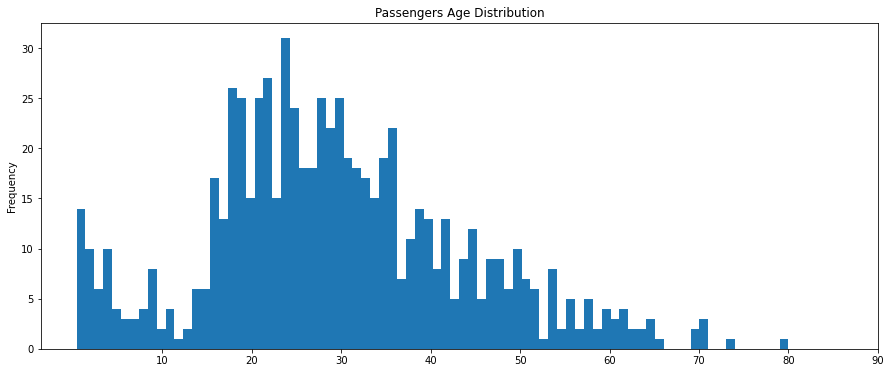

In [340]:
titanic.Age.plot(kind='hist', 
                     bins=80,
                     title='Passengers Age Distribution',
                     xlabel='Age',
                     ylabel='Survived',
                     xticks=range(10, 100, 10)
                )

In [ ]:
Данная гистограмма нам еще пригодится, как сравнение

In [270]:
titanic['Age'].value_counts().head(5)

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
Name: Age, dtype: int64

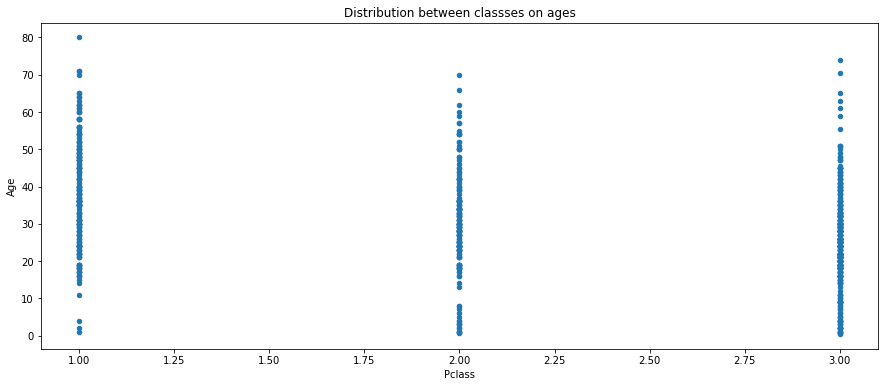

In [73]:
titanic.plot(kind='scatter', 
        x='Pclass', 
        y='Age', 
        title='Distribution between classses on ages')
plt.show()

#### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.


Кроме категориальных переменных я также удалил колонки 'Cabin', 'Parch', 'SibSp', и 'PassengerId', поскольку они не несли в даном случае смысловой нагрузки. Колонку 'Sex' нужно было изменить с помощью label encoding, но на данном этапе просто ее снесем 

In [27]:
titanic_min = titanic.dropna(axis=0).drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'SibSp', 'Sex', 'PassengerId'], axis=1)

In [271]:
titanic_min.head()

,Survived,Pclass,Age,Fare
1,1,1,38.0,71.2833
3,1,1,35.0,53.1000
6,0,1,54.0,51.8625
10,1,3,4.0,16.7000
11,1,1,58.0,26.5500


In [272]:
titanic_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   Fare      183 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 7.1 KB


In [357]:
X = titanic_min.drop('Survived', axis=1)

In [358]:
Y = titanic_min['Survived']

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

In [360]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [361]:
model.score(X_train, y_train) 

0.703125

In [362]:
model.score(X_test, y_test) 

0.7090909090909091

В общем-то даже и ничего. Но в данном случае зависимость между колонками и так была заметна и понятна (чем выше класс, тем больше шансов выбраться и попасть на спасательные шлюпки). Тут еще сыграл роль и random state (в других вариантах разница в качестве между тренировочной и тестовой выборкой была серьезной)

#### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.




In [249]:
titanic_opt = titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Parch', 'SibSp', 'PassengerId'], axis=1)

Все выше описано. PassengerId - вообще порядковый номер. Cabin имеет больше всего пропусков, кроме того вообще не несет смысловой нагрузки, поскольку у нас и так есть Pclass, демонстрирующий класс пассажира. 

#### 5. Проверьте данные на наличие пропущенных значений.
    
    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
    
    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

a) исходная модель содержит 891 строку. При удалении всех пропусков остается 183 строки. Итого:

In [91]:
print('Будет потерянно', round(100 - ((183/891)*100),2), '%')

Будет потерянно 79.46 %


In [250]:
titanic_opt.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [251]:
titanic_opt = titanic_opt.fillna(0)

In [252]:
titanic_opt[titanic_opt['Age'] == 0].value_counts().head(30)

Survived  Pclass  Sex     Age  Fare   
0         3       male    0.0  7.8958     15
                               8.0500     12
                               7.7500     10
1         3       female  0.0  7.7500      7
0         2       male    0.0  0.0000      6
          3       male    0.0  7.2250      5
                               7.2292      5
                               69.5500     4
                  female  0.0  69.5500     3
                  male    0.0  7.2500      3
1         3       female  0.0  15.5000     3
                               7.8792      3
0         3       female  0.0  25.4667     3
                  male    0.0  15.5000     3
          1       male    0.0  0.0000      2
          3       male    0.0  24.1500     2
1         3       female  0.0  16.1000     2
                               22.3583     2
                  male    0.0  15.2458     2
0         3       male    0.0  19.9667     2
                               14.5000     2
1         3     

Приведенная выше таблица позволяет нам:
   - понять, что большая часть пропусков находится в классах 2 и 3
   - в теории (если сильно захотеть) заполнить пропуски в колонке Age средними значениями возраста для ценовых диапазонов купленных билетов
   Но мы будем проще и возьмем медиану по возрастам относительно классов обслуживания (тем более, что данные значения очень схожы со средними по классам)

In [290]:
titanic_opt.groupby(['Pclass', 'Survived']).mean()

Sex        Age       Fare
Pclass Survived                                
1      0         0.962500  41.956250  64.684008
       1         0.330882  35.330294  95.608029
2      0         0.938144  33.144330  19.412328
       1         0.195402  25.998046  22.055700
3      0         0.806452  24.758065  13.669364
       1         0.394958  20.461513  13.694887

In [255]:
titanic_opt.Age.value_counts()

0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: Age, Length: 89, dtype: int64

In [262]:
titanic_opt['Age'] = np.where((titanic_opt['Age']  == 0) & (titanic_opt['Pclass'] == 1), 35, titanic_opt['Age'])
titanic_opt['Age'] = np.where((titanic_opt['Age']  == 0) & (titanic_opt['Pclass'] == 2), 28, titanic_opt['Age'])
titanic_opt['Age'] = np.where((titanic_opt['Age']  == 0) & (titanic_opt['Pclass'] == 3), 20, titanic_opt['Age'])

In [263]:
titanic_opt.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Проблема

Проблема заключается в том, что вполне естественно, больше всего погибло пассажиров 3-го класса, а следовательно, замена на конкретное значение вызвало автоматически дисбаланс в возрасте пассажиров

In [339]:
tit_surv = titanic_opt.groupby('Pclass').mean().reset_index()

In [338]:
print('из пассажиров 1-го класса выжило 62.9% \n')
print('из пассажиров 2-го класса выжило 47.2% \n')
print('из пассажиров 3-го класса выжило 24.2% \n')
tit_surv.head()

из пассажиров 1-го класса выжило 62.9% 

из пассажиров 2-го класса выжило 47.2% 

из пассажиров 3-го класса выжило 24.2% 



,Pclass,Survived,Sex,Age,Fare
0,1,0.629630,0.564815,37.784352,84.154687
1,2,0.472826,0.586957,29.765380,20.662183
2,3,0.242363,0.706721,23.716741,13.675550


In [266]:
titanic_opt.Age.value_counts()

20.00    151
35.00     48
28.00     36
24.00     30
22.00     27
        ... 
55.50      1
74.00      1
0.92       1
70.50      1
12.00      1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:title={'center':'Passengers Age Distribution'}, ylabel='Frequency'>

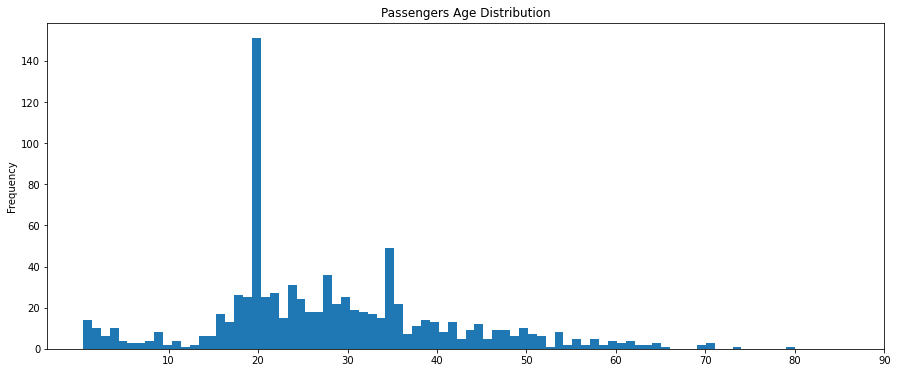

In [342]:
 titanic_opt.Age.plot(kind='hist', 
                     bins=80,
                     title='Passengers Age Distribution',
                     xlabel='Age',
                     ylabel='Survived',
                     xticks=range(10, 100, 10)
                )

Сравним с картиной на исходных данных

<AxesSubplot:title={'center':'Passengers Age Distribution'}, ylabel='Frequency'>

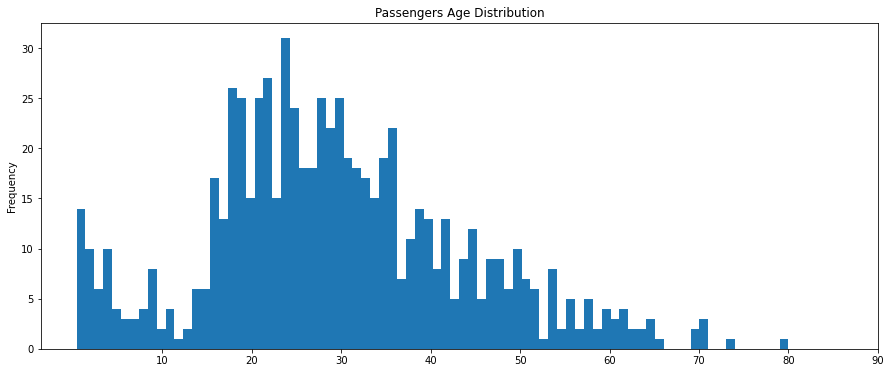

In [341]:
titanic.Age.plot(kind='hist', 
                     bins=80,
                     title='Passengers Age Distribution',
                     xlabel='Age',
                     ylabel='Survived',
                     xticks=range(10, 100, 10)
                )

Перекос сильный. Но, попробуем работать с тем, что есть

In [344]:
le = LabelEncoder()
le.fit(titanic_opt['Sex'])


LabelEncoder()

In [363]:
titanic_opt['Sex'] = le.transform(titanic_opt['Sex'])

In [373]:
XX = titanic_opt.drop('Survived', axis = 1)

In [374]:
XX

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,20.0,23.4500
889,1,1,26.0,30.0000


In [375]:
YY = titanic_opt['Survived'] 
YY

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [376]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, YY, test_size=0.3, random_state=44)

In [377]:
model_opt = LogisticRegression()
model_opt.fit(XX_train, yy_train)

LogisticRegression()

In [378]:
model_opt.score(XX_test, yy_test)

0.7686567164179104

Итог: Качество модели возросло. Думаю, что если покопаться с данными и сделать более детальную разбивку по возрастам, а также сгенерировать новые данные, то можно повысить качество модели до 80-86%